In [1]:
from vae import resVAE

from plot.plot import plot_loss
from data import make_pinwheel_data
from svae import SVAE

In [2]:
hyperparameters = {
    "VAE_parameters": {
        "latent_dim": 2,
        "input_size": 2,
        "hidden_size": 40,
        "recon_loss": "likelihood",
        "name": "vae",
    },
    "VAE_train_parameters": {"epochs": 500, "batch_size": 32, "kld_weight": 0.1},
    "pinwheel_data_parameters": {
        "radial_std": 0.3,
        "tangential_std": 0.05,
        "num_classes": 5,
        "num_per_class": 100,
        "rate": 0.25,
    },
    "SVAE_train_parameters": {
        "K": 15,
        "batch_size": 50,
        "epochs": 500,
        "kld_weight": 0.35,
    },
}

In [3]:
# generate synthetic data
data = make_pinwheel_data(**hyperparameters["pinwheel_data_parameters"])

In [4]:
# get encoder/decoder
network = resVAE(**hyperparameters["VAE_parameters"])

Training the SVAE ...


  0%|          | 0/501 [00:00<?, ?it/s]/var/tmp/vandenheu/SVAE/distributions/dirichlet.py:12: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /tmp/xdg_cache_vandenheu/torch/kernels. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  stats = torch.digamma(alpha) - torch.digamma(torch.sum(alpha, -1, keepdim=True))
 57%|█████▋    | 285/501 [00:58<00:44,  4.88it/s]

iteration limit reached


 76%|███████▌  | 381/501 [01:19<00:28,  4.14it/s]

iteration limit reached


 82%|████████▏ | 411/501 [01:25<00:22,  3.91it/s]

iteration limit reached


 83%|████████▎ | 415/501 [01:26<00:22,  3.79it/s]

iteration limit reached


 84%|████████▍ | 420/501 [01:27<00:20,  3.90it/s]

iteration limit reached


 84%|████████▍ | 422/501 [01:28<00:22,  3.56it/s]

iteration limit reached


 85%|████████▌ | 426/501 [01:29<00:17,  4.27it/s]

iteration limit reached


 87%|████████▋ | 437/501 [01:31<00:14,  4.56it/s]

iteration limit reached


 88%|████████▊ | 439/501 [01:32<00:18,  3.29it/s]

iteration limit reached


 89%|████████▉ | 445/501 [01:33<00:13,  4.29it/s]

iteration limit reached


 91%|█████████ | 454/501 [01:36<00:12,  3.69it/s]

iteration limit reached


 91%|█████████ | 455/501 [01:36<00:13,  3.40it/s]

iteration limit reached


 91%|█████████ | 456/501 [01:37<00:13,  3.21it/s]

iteration limit reached


 92%|█████████▏| 463/501 [01:38<00:09,  4.10it/s]

iteration limit reached


 93%|█████████▎| 464/501 [01:39<00:10,  3.64it/s]

iteration limit reached


 95%|█████████▍| 475/501 [01:41<00:05,  4.89it/s]

iteration limit reached
iteration limit reached


 98%|█████████▊| 489/501 [01:44<00:02,  4.45it/s]

iteration limit reached


100%|██████████| 501/501 [01:46<00:00,  4.69it/s]


Finished training of the SVAE


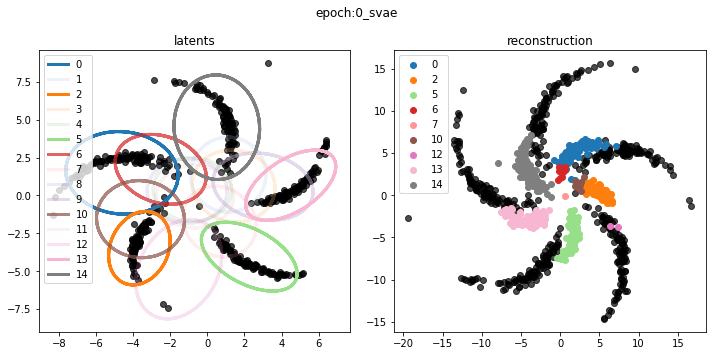

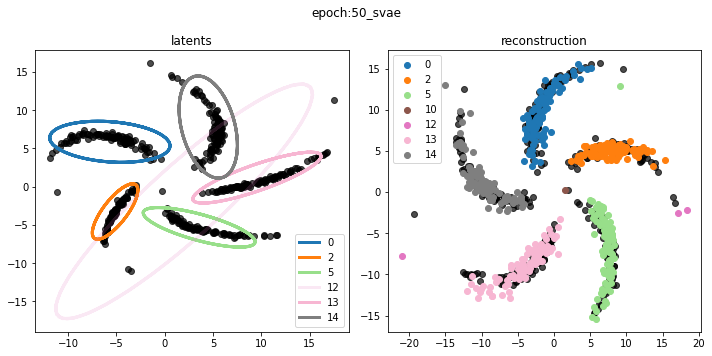

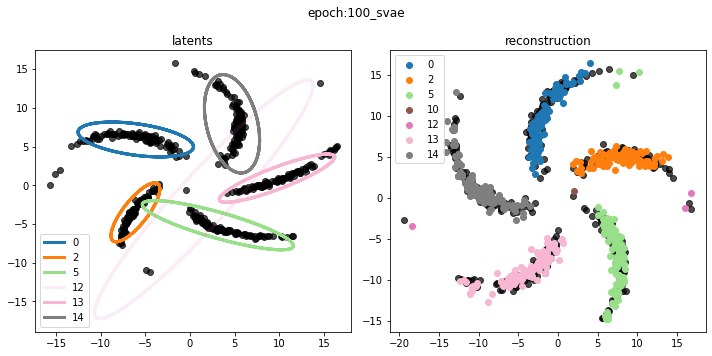

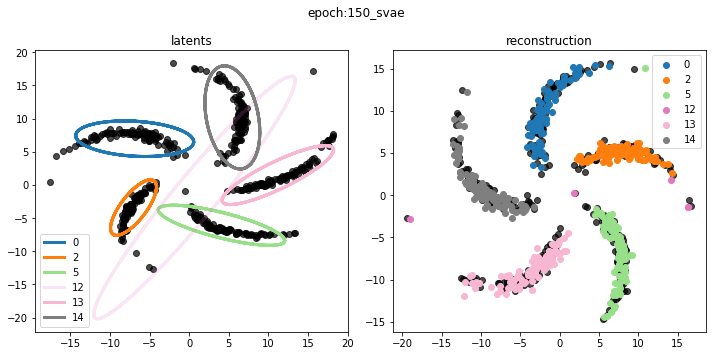

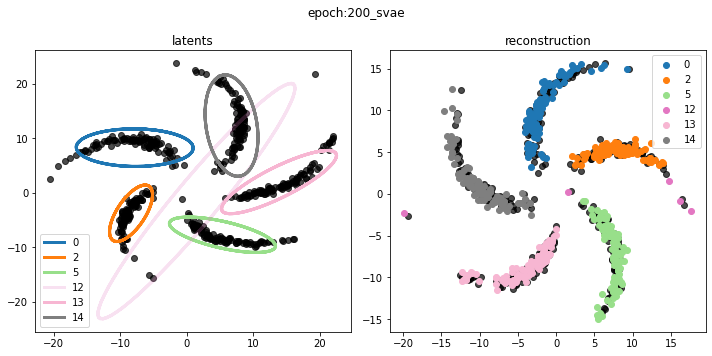

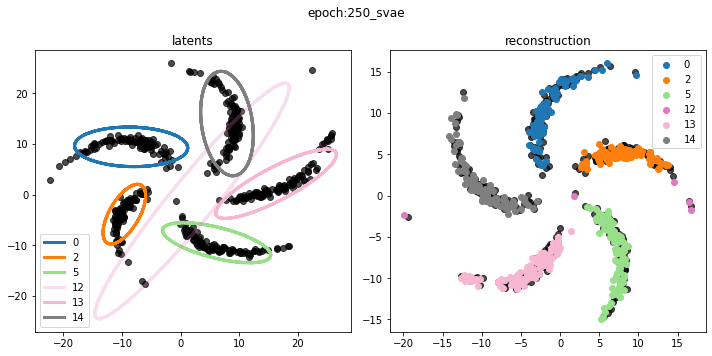

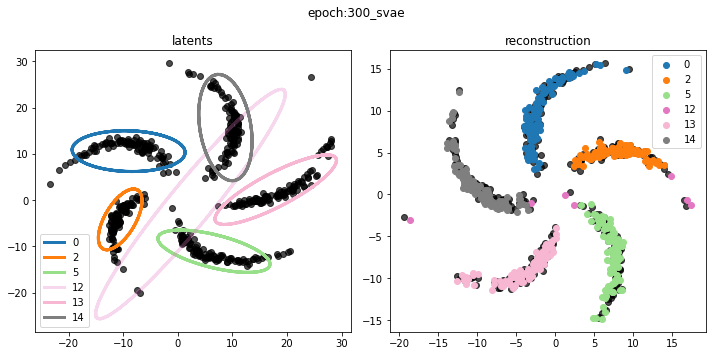

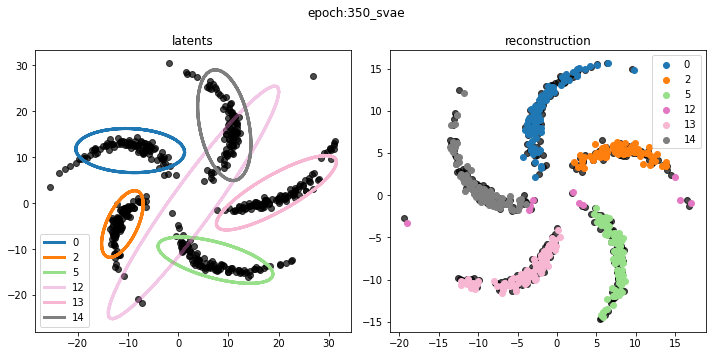

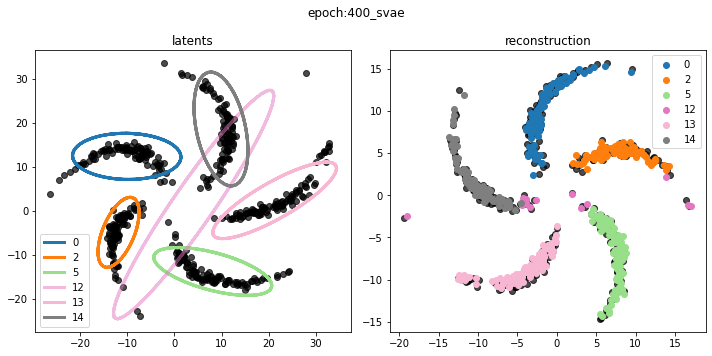

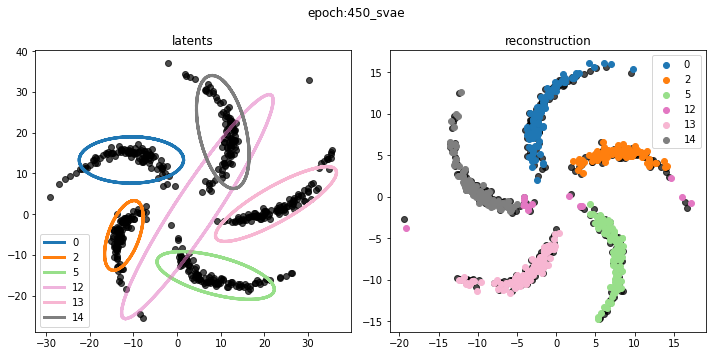

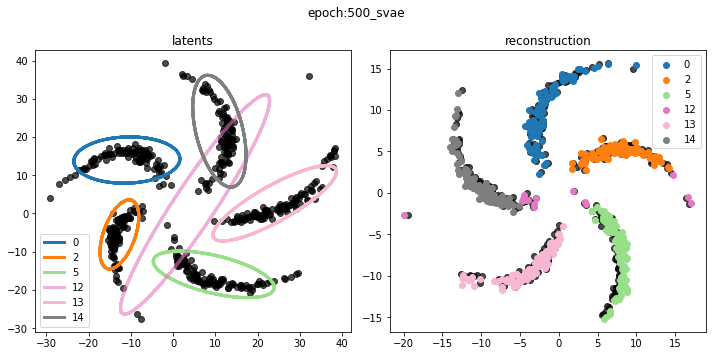

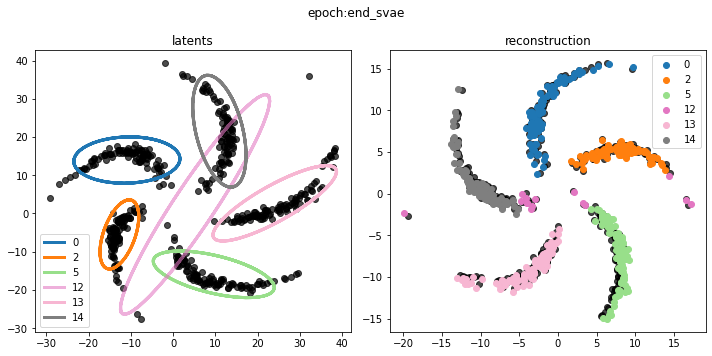

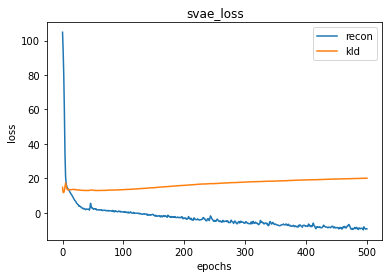

In [5]:
model = SVAE(network)
train_loss = model.fit(
    data,
    **hyperparameters["SVAE_train_parameters"]
)
plot_loss(
    train_loss, title="svae_loss"
)